In [1]:
%run PreProcessing.ipynb

Current Progress: 100.0 %


In [2]:
field_data = zone_data.copy()

In [3]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134969 entries, 0 to 134968
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   fieldzone          134969 non-null  object        
 1   sample_date        134969 non-null  datetime64[ns]
 2   field              134969 non-null  object        
 3   zone               134969 non-null  object        
 4   diameter           134969 non-null  float64       
 5   stripped_diameter  134969 non-null  float64       
 6   fieldzonedate      134969 non-null  object        
 7   planting_date      134969 non-null  datetime64[ns]
 8   variety            134969 non-null  object        
 9   method             134969 non-null  object        
 10  inputs             134969 non-null  object        
 11  protection         134969 non-null  object        
 12  planting_rate      134969 non-null  int64         
 13  sand               134969 non-null  int64   

In [4]:
field_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   field                      755 non-null    object        
 1   zone                       755 non-null    int32         
 2   planting_date              755 non-null    datetime64[ns]
 3   variety                    755 non-null    object        
 4   method                     755 non-null    object        
 5   inputs                     755 non-null    object        
 6   protection                 755 non-null    object        
 7   planting_rate              755 non-null    int64         
 8   sand                       755 non-null    int64         
 9   silt                       755 non-null    int64         
 10  clay                       755 non-null    int64         
 11  organic_matter             755 non-null    float64       
 12  harvest_

In [5]:
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams["savefig.format"] = 'jpeg'

In [6]:
def filter_df(field_list, date_list, variety_list):
    """Function to filter data for graphing."""
    
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]
    if date_list:
        df = df[df['sample_date'].isin(date_list)]
    if variety_list:
        df = df[df['variety'].isin(variety_list)]
    
    return df
    

def conventional_comparison(field_list, date_list, variety_list):
    """Function to create and save non-cumulative kde plot for multiple conventional zones on a given date"""
    
    name = 'Conventional Comparison'
    df = filter_df(field_list, date_list, variety_list)
        
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = False)
    
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    plt.xlim(0, 70)
    plt.ylabel('Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
    # Bar plot to make means easier to determine
    chart = sns.barplot(data = df,
                        y = 'fieldvarietydate',
                        x = 'stripped_diameter',
                        ci = None,
                        orient = "h")
    chart.bar_label(chart.containers[0], fmt='%.2f', label_type='center')
    plt.show()
    
def conventional_comparison_cumulative(field_list, date_list, variety_list, upper, lower):
    """Function to create and save cumulative kde plot for multiple conventional zones on a given date"""

    name = 'Conventional Cumulative Comparison'    
    df = filter_df(field_list, date_list, variety_list)
        
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = True)
    
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    plt.axhline(y = upper, color = 'red')
    plt.axhline(y = lower, color = 'red')
    plt.xlim(0, 70)
    plt.ylabel('Cumulative Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def baby_comparison(field_list, date_list, variety_list):
    """Function to create and save non-cumulative kde plot for multiple baby zones on a given date"""
    
    name = 'Baby Comparison'
    df = filter_df(field_list, date_list, variety_list)
    
    ax = sns.displot(df,
                     x="stripped_diameter",
                     hue="fieldvarietydate",
                     kind="kde",
                     fill=True,
                     bw_adjust=1.5,
                     common_norm=True)
    
    plt.axvline(x=12, color='grey')
    plt.axvline(x=20, color='grey')
    plt.ylabel('Proportion of Population')
    plt.xlim(0, 40)
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def baby_comparison_cumulative(field_list, date_list, variety_list, upper, lower):
    """Function to create and save cumulative kde plot for multiple baby zones on a given date"""
    
    name = 'Baby Cumulative Comparison'
    df = filter_df(field_list, date_list, variety_list)
        
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = True)
    
    plt.axvline(x=12, color='grey')
    plt.axvline(x=20, color='grey')
    plt.axhline(y = upper, color = 'red')
    plt.axhline(y = lower, color = 'red')
    plt.xlim(0, 40)

    plt.ylabel('Cumulative Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
    
def organic_comparison(field_list, date_list, variety_list):
    """Function to create and save non-cumulative kde plot for multiple organic zones on a given date"""

    
    name = 'Organic Comparison'
    df = filter_df(field_list, date_list, variety_list)
    
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=2,
                common_norm=True)
    
    plt.axvline(x=18, color='grey')
    plt.axvline(x=42, color='grey')
    plt.ylabel('Proportion of Population')
    plt.xlim(0, 60)
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()
    
def field_growth(field_list):
    """Function to create and save kde plot that shows all distributions for a given list of fields."""

    name = 'Plant Growth'
    df = summary_data.copy()
    
    if field_list:
        df = df[df['field'].isin(field_list)]

    
    sns.displot(df,
                x="stripped_diameter",
                hue="fieldvarietydate",
                kind="kde",
                fill=True,
                bw_adjust=1.5,
                common_norm = False,
                cumulative = False)
    
    plt.axvline(x=20, color='grey')
    plt.axvline(x=45, color='grey')
    plt.xlim(0, 70)
    plt.ylabel('Proportion of Population')
    plt.title(name)
    plt.savefig(name, dpi = 200)
    plt.show()

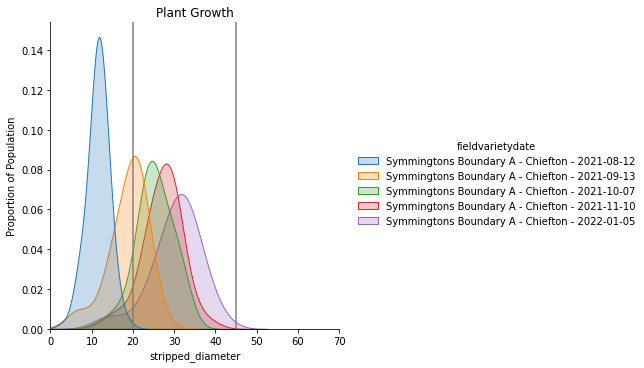

In [7]:
field_growth(['Symmingtons Boundary A'])

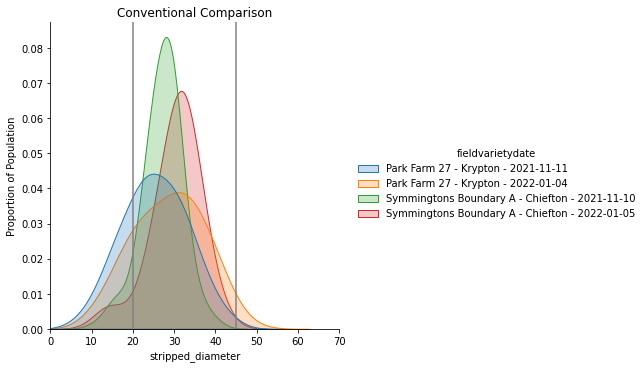

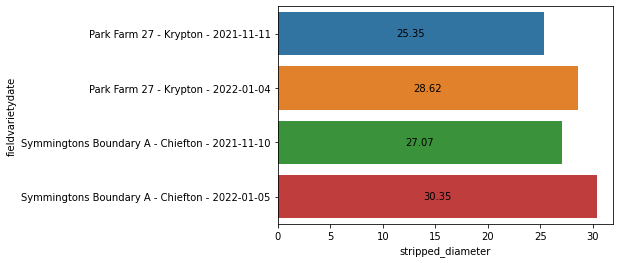

In [8]:
conv_field_list = ['Symmingtons Boundary A', 'Park Farm 27']
conv_date_list = ['2022-01-04', '2021-11-10', '2021-11-11', '2022-01-05']
conv_variety_list = ['Chiefton', 'Krypton']

conventional_comparison(conv_field_list, conv_date_list, conv_variety_list)

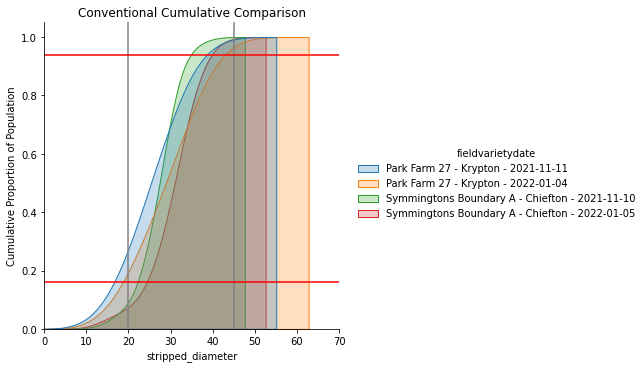

In [9]:
conventional_comparison_cumulative(conv_field_list, conv_date_list, conv_variety_list, 0.94, 0.16)

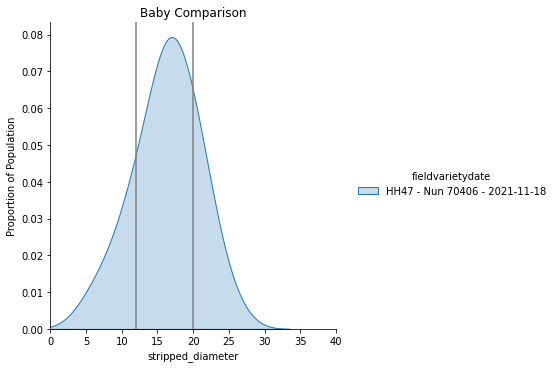

In [10]:
baby_field_list = ['HH47']
baby_date_list = ['2021-11-18']
baby_variety_list = ['Nun 70406']

baby_comparison(baby_field_list, baby_date_list, baby_variety_list)

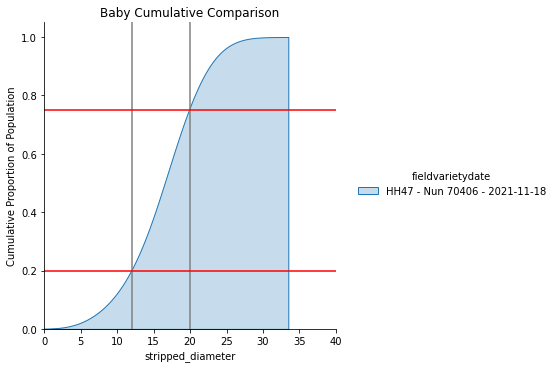

In [11]:
baby_comparison_cumulative(baby_field_list, baby_date_list, baby_variety_list, 0.75, 0.2)

<AxesSubplot:xlabel='solar_radiation', ylabel='mean_diameter'>

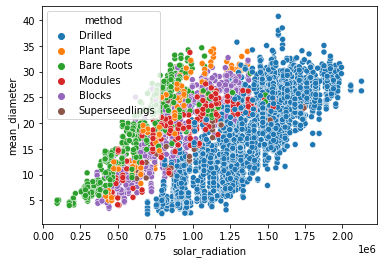

In [12]:
sns.scatterplot(data = summary_data_avg, x = 'solar_radiation', y = 'mean_diameter', hue = 'method')

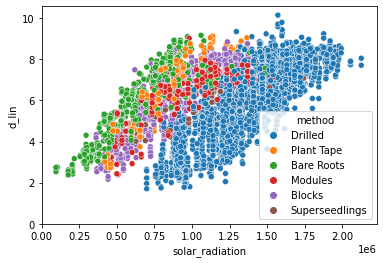

In [13]:
sns.scatterplot(data = summary_data_avg, x = 'solar_radiation', y = 'd_lin', hue = 'method')
plt.xlim(0)
plt.ylim(0)
plt.show()

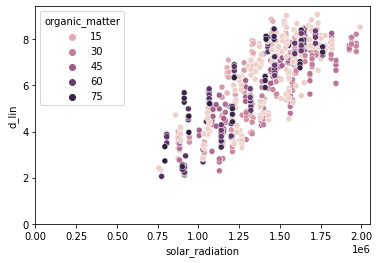

In [14]:
sns.scatterplot(data = summary_data_avg[(summary_data_avg.method == 'Drilled') & (summary_data_avg.variety.isin(['Chiefton']))], x = 'solar_radiation', y = 'd_lin', hue = 'organic_matter')
plt.xlim(0)
plt.ylim(0)
plt.show()

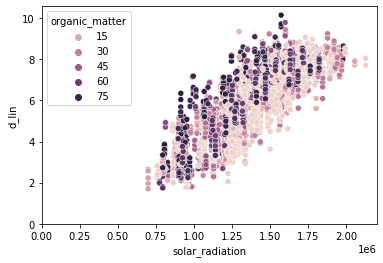

In [15]:
sns.scatterplot(data = summary_data_avg[(summary_data_avg.method == 'Drilled')], x = 'solar_radiation', y = 'd_lin', hue = 'organic_matter')
plt.xlim(0)
plt.ylim(0)
plt.show()

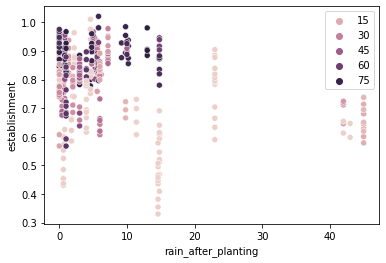

In [16]:
sns.scatterplot(x = 'rain_after_planting', y = 'establishment', hue='organic_matter', data = zone_data[(zone_data.method == 'Drilled') & (zone_data.inputs == 'Conventional')])
plt.legend(loc = 'upper right')
plt.show()

6    765
4    675
Name: row_config, dtype: int64
2021-09-07    253
2021-07-29    244
2021-08-18    240
2021-11-12    235
2021-10-05    235
2021-12-15    233
Name: sample_date, dtype: int64


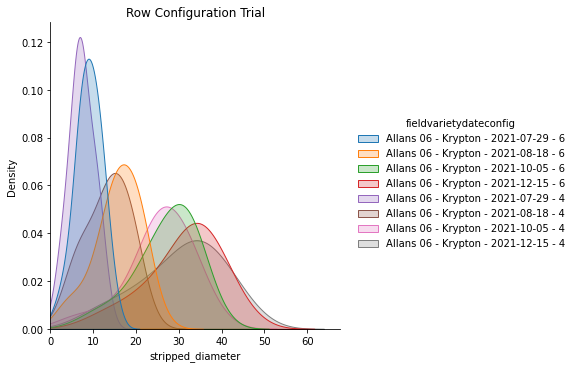

In [17]:
allans06_df = summary_data[(summary_data.field == 'Allans 06')].copy()
allans06_df['row_config'] = 4
allans06_df.loc[allans06_df['zone'].astype(int) < 4, 'row_config'] = 6
allans06_df['fieldvarietydateconfig'] = allans06_df['fieldvarietydate'] + ' - ' + allans06_df['row_config'].astype(str)

print(allans06_df['row_config'].value_counts())
print(allans06_df['sample_date'].value_counts())


allans06_df = allans06_df[allans06_df['sample_date'].isin(['2021-07-29', '2021-08-18', '2021-10-05', '2021-12-15'])]

allans06_df.head()

sns.displot(allans06_df,
            x="stripped_diameter",
            hue="fieldvarietydateconfig",
            kind="kde",
            fill=True,
            bw_adjust=1.5,
            common_norm = False,
            cumulative = False)

plt.xlim(0)
plt.ylim(0)
name = 'Row Configuration Trial'
plt.title(name)
plt.savefig(name, dpi=200)
plt.show()
